In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',  labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
# Ex 7

In [3]:
# Let's load the moons dataset

In [17]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4)

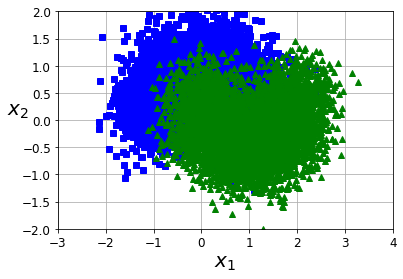

In [18]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-3, 4, -2, 2])
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape

(8000, 2)

In [22]:
y_train.shape

(8000,)

In [24]:
X_test.shape

(2000, 2)

In [25]:
y_test.shape

(2000,)

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier() # base model (with default hyperparameters)

In [29]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred = tree_clf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test, y_pred)

0.796

In [33]:
# 80% accuracy for the base Decision Tree Classifier

In [35]:
# Let's try to use a grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 3, 4]
}

In [36]:
grid = GridSearchCV(tree_clf, param_grid, verbose=2)

In [37]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
[CV] END .max_depth=5, max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END .max_depth=5, max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END .max_depth=5, max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END .max_depth=5, max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END .max_depth=5, max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END .max_depth=5, max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END .max_depth=5, max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END .max_depth=5, max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END .max_depth=5, max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END .max_depth=5, max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END .max_depth=5, max_leaf_nodes=2, min_samples_split=4; total time=   0.0s
[CV] END .max_depth=5, max_leaf_nodes=2, min

[CV] END max_depth=5, max_leaf_nodes=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_le

[CV] END max_depth=5, max_leaf_nodes=17, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=17, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=17, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=17, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=17, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=17, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=17, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=17, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=17, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_le

[CV] END max_depth=5, max_leaf_nodes=24, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=24, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=24, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=24, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=24, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=24, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=24, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=24, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=24, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=24, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=24, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=24, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_le

[CV] END max_depth=5, max_leaf_nodes=32, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=32, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=32, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=32, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=32, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=32, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=32, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=32, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=32, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=33, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=33, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=33, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_le

[CV] END max_depth=5, max_leaf_nodes=39, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=39, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=39, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=39, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=39, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=39, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=39, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=39, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=39, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=39, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=40, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=40, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_le

[CV] END max_depth=5, max_leaf_nodes=47, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=47, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=47, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=47, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=47, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=47, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=47, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=47, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=47, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=47, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=47, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=47, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_le

[CV] END max_depth=5, max_leaf_nodes=55, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=55, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=55, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=55, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=55, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=55, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=55, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=55, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=55, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=55, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=55, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=55, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_le

[CV] END max_depth=5, max_leaf_nodes=62, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=62, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=62, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=62, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=62, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=62, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=62, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=62, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=63, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=63, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=63, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=63, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_le

[CV] END max_depth=5, max_leaf_nodes=69, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=69, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=69, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=69, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=69, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=70, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=70, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=70, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=70, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=70, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=70, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=70, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_le

[CV] END max_depth=5, max_leaf_nodes=77, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=77, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=77, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=77, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=77, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=77, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=77, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=77, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=77, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=77, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=77, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=77, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_le

[CV] END max_depth=5, max_leaf_nodes=84, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=85, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=85, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=85, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=85, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=85, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=85, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=85, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=85, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=85, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=85, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=85, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_le

[CV] END max_depth=5, max_leaf_nodes=91, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=91, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=92, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=92, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=92, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=92, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=92, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=92, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=92, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=92, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=92, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=92, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_le

[CV] END max_depth=10, max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_l

[CV] END max_depth=10, max_leaf_nodes=9, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=9, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=9, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=

[CV] END max_depth=10, max_leaf_nodes=17, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=17, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=17, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=18, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=18, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=18, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=18, min_samples_split=2; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=10, max_leaf_nodes=24, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=24, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=24, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=24, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=24, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=24, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=24, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=24, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=24, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=24, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=25, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=25, min_samples_split=2; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=10, max_leaf_nodes=31, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=31, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=31, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=31, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=31, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=31, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=31, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=31, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=31, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=31, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=31, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=31, min_samples_split=4; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=10, max_leaf_nodes=38, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=38, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=38, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=38, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=38, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=38, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=38, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=38, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=38, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=38, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=38, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=39, min_samples_split=2; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=10, max_leaf_nodes=45, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=45, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=45, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=45, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=45, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=45, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=45, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=45, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=45, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=46, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=46, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=46, min_samples_split=2; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=10, max_leaf_nodes=52, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=52, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=52, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=53, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=53, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=53, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=53, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=53, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=53, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=53, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=53, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=53, min_samples_split=3; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=10, max_leaf_nodes=59, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=59, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=60, min_samples_split=3; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=10, max_leaf_nodes=66, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=66, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=66, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=67, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=67, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=67, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=67, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=67, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=67, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=67, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=67, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=67, min_samples_split=3; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=10, max_leaf_nodes=73, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=73, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=73, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=73, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=73, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=74, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=74, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=74, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=74, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=74, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=74, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=74, min_samples_split=3; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=10, max_leaf_nodes=80, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=80, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=80, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=80, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=80, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=80, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=80, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=80, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=81, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=81, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=81, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=81, min_samples_split=2; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=10, max_leaf_nodes=87, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=87, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=87, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=87, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=88, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=88, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=88, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=88, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=88, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=88, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=88, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=88, min_samples_split=3; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=10, max_leaf_nodes=95, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=95, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=95, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=95, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=95, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=95, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=95, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=95, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=95, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=96, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=96, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=96, min_samples_split=2; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=15, max_leaf_nodes=4, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=4, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=4, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_l

[CV] END max_depth=15, max_leaf_nodes=11, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=11, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=11, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=11, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=11, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=11, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=12, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=12, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=12, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=12, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=12, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=12, min_samples_split=3; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=15, max_leaf_nodes=19, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=19, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=19, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=19, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=19, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=19, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=20, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=20, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=20, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=20, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=20, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=20, min_samples_split=3; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=15, max_leaf_nodes=27, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=27, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=27, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=27, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=27, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=27, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=27, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=27, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=27, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=27, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=27, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=28, min_samples_split=2; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=15, max_leaf_nodes=33, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=34, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=34, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=34, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=34, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=34, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=34, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=34, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=34, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=34, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=34, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=34, min_samples_split=4; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=15, max_leaf_nodes=40, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=40, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=40, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=40, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=40, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=40, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=41, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=41, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=41, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=41, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=41, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=41, min_samples_split=3; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=15, max_leaf_nodes=48, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=48, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=48, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=48, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=48, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=48, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=48, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=48, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=49, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=49, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=49, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=49, min_samples_split=2; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=15, max_leaf_nodes=55, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=55, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=55, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=55, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=55, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=55, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=55, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=55, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=55, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=55, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=55, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=55, min_samples_split=4; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=15, max_leaf_nodes=62, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=62, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=62, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=62, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=62, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=62, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=62, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=62, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=62, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=62, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=62, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=62, min_samples_split=4; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=15, max_leaf_nodes=68, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=68, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=68, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=69, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=69, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=69, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=69, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=69, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=69, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=69, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=69, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=69, min_samples_split=3; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=15, max_leaf_nodes=76, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=76, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=76, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=76, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=77, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=77, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=77, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=77, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=77, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=77, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=77, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=77, min_samples_split=3; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=15, max_leaf_nodes=83, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=83, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=84, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=84, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=84, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=84, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=84, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=84, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=84, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=84, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=84, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=84, min_samples_split=3; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=15, max_leaf_nodes=91, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=91, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=91, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=91, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=91, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=91, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=91, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=91, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=91, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=91, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=91, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=91, min_samples_split=4; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=15, max_leaf_nodes=98, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=98, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=98, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=98, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=98, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=98, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=98, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=98, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=98, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=98, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=98, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=98, min_samples_split=4; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=None, max_leaf_nodes=7, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=7, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=7, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=7, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=7, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=7, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=7, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=7, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=7, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=7, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=7, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=7, min_samples_split=4; total time=   0.0s
[CV]

[CV] END max_depth=None, max_leaf_nodes=14, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=14, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=14, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=14, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=14, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=14, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=14, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=14, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=14, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=14, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=15, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=15, min_samples_split=2; total time=

[CV] END max_depth=None, max_leaf_nodes=21, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=21, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=21, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=21, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=21, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=22, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=22, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=22, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=22, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=22, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=22, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=22, min_samples_split=3; total time=

[CV] END max_depth=None, max_leaf_nodes=28, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=29, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=29, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=29, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=29, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=29, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=29, min_samples_split=4; total time=

[CV] END max_depth=None, max_leaf_nodes=35, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=35, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=35, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=36, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=36, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=36, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=36, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=36, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=36, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=36, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=36, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=36, min_samples_split=3; total time=

[CV] END max_depth=None, max_leaf_nodes=43, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=43, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=43, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=43, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=43, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=43, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=43, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=43, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=43, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=43, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=43, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=43, min_samples_split=4; total time=

[CV] END max_depth=None, max_leaf_nodes=49, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=49, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=49, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=50, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=50, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=50, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=50, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=50, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=50, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=50, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=50, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=50, min_samples_split=3; total time=

[CV] END max_depth=None, max_leaf_nodes=56, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=56, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=56, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=56, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=56, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=56, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=56, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=57, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=57, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=57, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=57, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=57, min_samples_split=2; total time=

[CV] END max_depth=None, max_leaf_nodes=64, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=64, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=64, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=64, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=64, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=64, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=64, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=64, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=64, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=64, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=64, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=64, min_samples_split=4; total time=

[CV] END max_depth=None, max_leaf_nodes=71, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=71, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=71, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=71, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=71, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=71, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=71, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=71, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=71, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=71, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=71, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=71, min_samples_split=4; total time=

[CV] END max_depth=None, max_leaf_nodes=78, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=78, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=78, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=78, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=78, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=78, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=78, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=78, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=78, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=78, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=78, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=79, min_samples_split=2; total time=

[CV] END max_depth=None, max_leaf_nodes=85, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=85, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=85, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=85, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=85, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=85, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=85, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=85, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=85, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=85, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=85, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=85, min_samples_split=4; total time=

[CV] END max_depth=None, max_leaf_nodes=92, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=92, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=92, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=92, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=93, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=93, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=93, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=93, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=93, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=93, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=93, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=93, min_samples_split=3; total time=

[CV] END max_depth=None, max_leaf_nodes=99, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=99, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=99, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=99, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=99, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=99, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=99, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=99, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=99, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, max_leaf_nodes=99, min_samples_split=4; total time=   0.0s


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, None],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=2)

In [39]:
grid.best_params_

{'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_split': 2}

In [40]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20)

In [42]:
best_tree_clf = grid.best_estimator_

In [43]:
y_pred = best_tree_clf.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

0.864

In [45]:
# 86% accuracy score: improvement from 80% (base model)

In [47]:
# Ex 8: Grow a forest

In [49]:
X.shape

(10000, 2)

In [50]:
y.shape

(10000,)

In [51]:
# Let's generate 1000 subsets of the training set, each containing 100 instances selected randomly

In [52]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []
rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [58]:
# We've found above that the best parameters are: {'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_split': 2}

In [60]:
from sklearn.base import clone

# clone: construct a new unfitted estimator with the same parameters
# use the same hyperparameters for all trees
forest = [clone(grid.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []
for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.7948175

In [61]:
# Now comes the magic. For each test set instance, generate the predictions of
# the 1,000 Decision Trees, and keep only the most frequent prediction (you can
# use SciPy’s mode() function for this). This gives you majority-vote predictions
# over the test set.

# Predict with each decision tree (from all 1000) and store the prediction results in Y_pred
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)
for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [66]:
Y_pred.shape
# 1000 trees
# 2000 predictions (instances in the test set)

(1000, 2000)

In [62]:
from scipy.stats import mode

# mode: return an array of the modal (most common) value in the passed array.
y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)
y_pred_majority_votes # most common predictions (from all 1000 decision trees)

array([[0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [71]:
# d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy
# than your first model (about 0.5 to 1.5% higher).
# Congratulations, you have trained a Random Forest classifier!

accuracy_score(y_test, np.ravel(y_pred_majority_votes))

0.868

In [72]:
# 86.8% accuracy score for the generated Random Forest classifier